# Examen parcial 1 (Python basico y visualizaciones)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10am del 17.12.2021 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Cada de los dos ejercicios abajo vale 100%, 
* usted puede escojer cual ejercicio quiere hacer. 
* si hace dos ejercisios en la mitad tambien gana 100%
* si hace los dos ejercicios completos, extra puntos voy a pasar para resultado de proximo parcial

## Ejercicio 1a. Calcular una soma (Taylor aproximacion de funcion cos) usando loop 


$$cos(x)=\sum_{k=0}^{\infty}\frac{(-1)^k x^{2k}}{(2k)!}$$ 

1) usando loop for calcular valor de cos(0.2) para k=2 (en loop k=0,1,2)
* (puede comparar su resultado con $cos(x)=1 - \frac{x^2}{2!}  + \frac{x^4}{4!}$
* (para hacer factorial-! usa: import math, math.factorial)

2) crear una funcion cos_taylor(x,k) que acepta dos parametros x y k y vuelve valor de cos(x) para dado numero de termos k
* (intenta con x=0.2 y k=2 para comparar con resultado de punto 1)

3) crear un vector xvec que tiene 100 elementos en rango de $-\pi$: $\pi$ y usando loop for para cada elemento de este vector llama la funcion cos_taylor(x,k) y guarda resultados en una lista "cos_approx=[]" usando methodo append (cos_approx.append()). usa valor de k=3 
* (pista sobre loop: for x in xvec:...)

4) hacer visualizacion de dos curvas en mismo plot:
* xvec vs cos_approx (label: Taylor approximation)
* xvec vs np.cos(xvec) (label: cos(x))
* usa labels para cada curva

*la formula completa de approximacion
<table><tr>
<td> <img src="imgs/maclaurin_cos.png" width="400" /> </td>
</tr></table>

In [1]:
import math
import numpy as np
# SUMA
x = 0.2
cos = 0
for i in range(2):
    cos += (((-1)**i)*(x**(2*i)))/math.factorial(2*i)
print('cos(0.2) =',cos)

cos(0.2) = 0.98


In [2]:
#Suma de Taylor.
#--------------------------------------------------
def cos_taylor(x,k):
    #----------------------------------------------
    try: #intenta
        import math
        import numpy as np
        cos = 0 #definimos valor inicial de la sumatoria
        for i in range(k): #como son k terminos
            cos += (((-1)**i)*(x**(2*i)))/math.factorial(2*i) #hacemos la sumatoria desde i = 0 hasta k
            #print(cos) 
        return cos #retornamos
    except Exception as error: #si hay error
        print(error) #imprime error
    

In [3]:
cos_taylor(0.2,2)

0.98

In [4]:
#VECTOR
import numpy as np
array = np.linspace(-np.pi,np.pi,100)
cos_approx=[]
for i in array:
     cos_approx.append(cos_taylor(i,3))

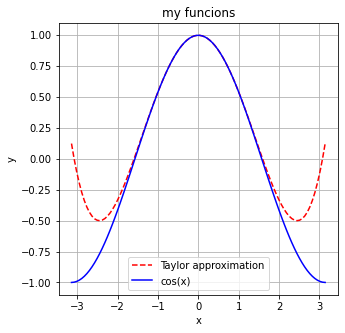

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(5,5)) #Así se define una figura
ax.plot(array,cos_approx,'--r',label='Taylor approximation') #Así se plotean los datos
ax.plot(array,np.cos(array),'-b',label='cos(x)') #Se pueden plotear listas y arrays de numpy
#Se pueden modificar distintos detalles
ax.legend() 
ax.set_title('my funcions') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

## Ejercicio 1b. Visualizar imagenes de un conjunto de datos



#### Un documento 'images_32x32.mat' contiene ~ 25,000 de imagenes de digitos, images son en colores (cada imagen tiene 3 capas RGB) y cada imagen es 32x32 pixeles

1) convertir este conjunto de tipo MAT a un dicionario
* (import scipy.io,   
   imgs_dict = scipy.io.loadmat(images_32x32.mat)

2) muestra que llaves tiene este dicionario y muestra que dimensiones tienen las llaves **X** y **y**

3) visualiza aleatoriamente 10 de estos imagenes en una forma de matriz 1x10 (fila de 10 imagenes)
* los imagenes son guardados en llave 'X' de este dicionario

4) convertir las imágenes en color a escala de grises promediando una de las dimensiones y volver a mostrar las mismos 10 imagenes aleatorios en otra matriz de 1x10 (fila de 10 imagenes)

5) seria bien que los titulos de los 10 imagenes coresponden a etiquietas de llave "y"

In [6]:
!ls

examen_parcial_1.ipynb	images_32x32.mat


In [7]:
#Importamos los módulos a usar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#-----------------------------------
#Para mostrar imagen dentro de jupyter
%matplotlib inline

import scipy.io
imgs_dict = scipy.io.loadmat('images_32x32.mat')

In [8]:
imgs_dict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [9]:
imgs_dict['y'].shape #26032 etiquetas

(26032, 1)

In [10]:
imgs_dict['X'].shape #26032 Imágenes de 32x32 de 3 capas (rgb)

(32, 32, 3, 26032)

In [11]:
#Organizamos las dimensiones:
a = np.reshape(imgs_dict['X'],(26032,32,32,3))

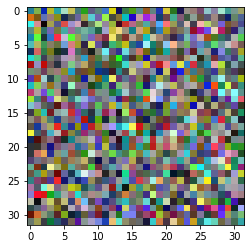

In [12]:
plt.imshow(a[0]) #Mostramos una imagen

/home/michal/.local/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


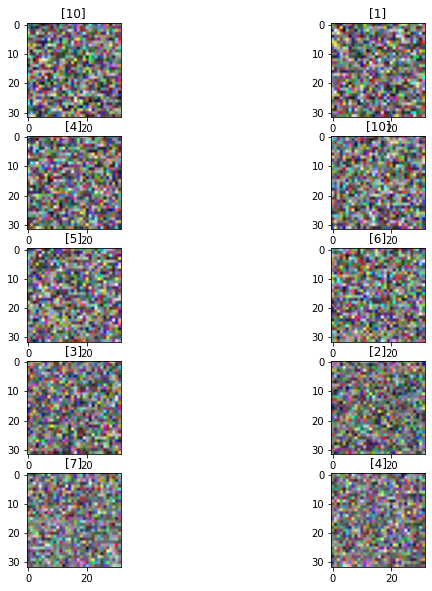

In [13]:
#para mostrar los 10 graficos de imagenes
#Creamos figura de 5x5 para mostrar las 25 imagenes
fig,ax = plt.subplots(5,2,figsize=(10,10)) 

#Hacemos doble ciclo para recorrer las filas y columnas de la matriz 5x2
randomlist = []
for i in range(5):
    for j in range(2):
        
        #elegimos un número random --> lo pasamos a int
        random = int(np.random.randint(0,26032,1)) #entre 0 y 1797 porque son 1797 imágenes
        randomlist.append(random)
                          
        #mostramos el elemento [random] de la lista de imagenes
        ax[i,j].imshow(a[random]) 
        
        #ponemos como titulo el elemento [random] de la key de etiquetas
        ax[i,j].set_title(imgs_dict['y'][random])  
        
        #(coinciden en indice)

In [14]:
#para mostrar los 10 graficos de imagenes
#Creamos figura de 5x5 para mostrar las 25 imagenes
fig,ax = plt.subplots(5,2,figsize=(10,10)) 

#Hacemos doble ciclo para recorrer las filas y columnas de la matriz 5x2
for i in range(5):
    for j in range(2):
        
    #mostramos el elemento [random] de la lista de imagenes
            ax[i,j].imshow(np.average(a[h]) 
        #ponemos como titulo el elemento [random] de la key de etiquetas
            ax[i,j].set_title(imgs_dict['y'][h])  
        
        #(coinciden en indice)

SyntaxError: invalid syntax (<ipython-input-14-657ab6d2b7f1>, line 12)

In [ ]:
#creo que al hacer el reshape modifiqué las imágenes

In [ ]:
# Comentarios:

# Exercise 1:
#   compilation (max: 2.5p):                     2.5p   
#   correctness of the result (max: 2.5p):       2.5p 
#   implementation of the function (max: 2.5p):  2.5p 
#   plot (max: 2.5p):                            2.5p 

# TOTAL:                                         10p (out of 10p)  